In [1]:
%run setup.py

In [2]:
stars = pd.read_excel(rootpath+'surface/sample/samples.xlsx')
idx = (stars['ifmodelling']==1) & ((stars['e_lum_J']/stars['lum_J'])<0.3) & np.isfinite(stars['Teff']) & np.isfinite(stars['[M/H]'])

stars = stars.loc[idx,:].reset_index(drop=True)
       
idx = ~np.isfinite(stars['Dnu'])
stars.loc[idx, 'Dnu'] = stars.loc[idx, 'Dnu_guess']

# modes = pd.read_excel(rootpath+'surface/sample/modes.xlsx')

In [3]:
suf = '_micp'
original_cols = ['star_mass', 'radius', 'star_age', ]
to_append_cols = ['mass'+suf, 'radius'+suf, 'age'+suf, ]
to_append_e_cols = ['e_'+col for col in to_append_cols]

def multi(inputs):
    istar, star = inputs
    filepath = rootpath+'surface/results_spec_gaia_nu_sc/{:0.0f}/summary_prob.txt'.format(star['KIC'])
    if not os.path.exists(filepath): return [np.nan]*(len(to_append_cols)*2)
    data = ascii.read(filepath, delimiter=',')
    var = list(data[original_cols][1])
    e_var = list((np.array(list(data[original_cols][2])) - np.array(list(data[original_cols][0])))/2.)
    return var + e_var

r = process_map(multi, stars.iterrows(), total=len(stars), max_workers=12)
stars.loc[:, to_append_cols+to_append_e_cols]  = np.array(r)


suf = '_mic'
original_cols = ['star_mass', 'radius', 'star_age', ]
to_append_cols = ['mass'+suf, 'radius'+suf, 'age'+suf, ]
to_append_e_cols = ['e_'+col for col in to_append_cols]

def multi(inputs):
    istar, star = inputs
    filepath = rootpath+'surface/results_spec_gaia_nu/{:0.0f}/summary_prob.txt'.format(star['KIC'])
    if not os.path.exists(filepath): return [np.nan]*(len(to_append_cols)*2)
    data = ascii.read(filepath, delimiter=',')
    var = list(data[original_cols][1])
    e_var = list((np.array(list(data[original_cols][2])) - np.array(list(data[original_cols][0])))/2.)
    return var + e_var

r = process_map(multi, stars.iterrows(), total=len(stars), max_workers=12)
stars.loc[:, to_append_cols+to_append_e_cols]  = np.array(r)


# for suffix in ['_combined', '_combined_linear']: #, '_combined_linear']: #
#     gval = 'g'+suffix
#     dval = 'density'+suffix
#     mval = 'mass'+suffix
#     rval = 'radius'+suffix
#     e_gval = 'e_g'+suffix
#     e_dval = 'e_density'+suffix
#     e_mval = 'e_mass'+suffix
#     e_rval = 'e_radius'+suffix
#     stars[gval] = stars[mval]/stars[rval]**2.
#     stars[e_gval] = ((stars[e_mval]/stars[mval])**2.0 \
#                       + (2*stars[e_rval]/stars[rval])**2.0)**0.5 * stars[gval]
#     stars[dval] = stars[mval]/stars[rval]**3.
#     stars[e_dval] = ((stars[e_mval]/stars[mval])**2.0 \
#                       + (3*stars[e_rval]/stars[rval])**2.0)**0.5 * stars[dval]

  0%|          | 0/1276 [00:00<?, ?it/s]

  0%|          | 0/1276 [00:00<?, ?it/s]

In [5]:
# cat ../../hpc/results_sc_cubic_linear_nueff/0/summary_prob.txt
stars.head()

,index,KIC,ifsplitting,ifmodelling,ifsupressed,comments,stage,names,_RA,_DE,...,age_micp,e_mass_micp,e_radius_micp,e_age_micp,mass_mic,radius_mic,age_mic,e_mass_mic,e_radius_mic,e_age_mic
0,0,1,NaN,1,0.0,NaN,esg,mu Her,266.61469,27.720621,...,1.027806e+10,0.018750,0.009622,4.907475e+08,1.141160,1.718086,9.720291e+09,0.025195,0.018710,7.782432e+08
1,1,2991448,-1.0,1,0.0,NaN,esg,NaN,291.82490,38.113190,...,1.107250e+10,0.004345,0.001764,1.140866e+08,1.033060,1.734757,9.497571e+09,0.090965,0.069659,8.311437e+08
2,3,4346201,-1.0,1,0.0,NaN,esg,NaN,285.28595,39.498050,...,5.806878e+09,0.023635,0.017292,8.557629e+07,1.181200,1.974774,5.095510e+09,0.018115,0.041925,4.755843e+08
3,5,5607242,1.0,1,0.0,NaN,esg,NaN,287.64633,40.843060,...,5.035746e+09,0.038915,0.025807,1.520147e+08,1.203370,2.384464,5.096747e+09,0.037895,0.020417,1.777431e+08
4,6,5689820,1.0,1,0.0,NaN,esg,NaN,286.22723,40.927730,...,8.771659e+09,0.026365,0.016155,6.305273e+08,1.225948,2.346414,8.167760e+09,0.025011,0.020096,8.946676e+08


0

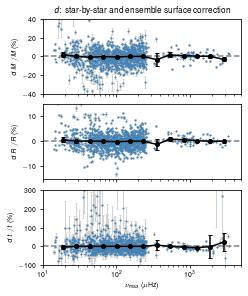

In [6]:
import matplotlib.colors
norm = matplotlib.colors.Normalize(vmin=-0.5,vmax=0.5)


fig, axes = plt.subplots(figsize=mnras_size(ratio=1.2,column='one'), nrows=3, ncols=1, 
                         squeeze=False, constrained_layout=True)
axes = axes.reshape(-1)

# idx = ((stars['numax']>0) & (stars['ALPHA_M']<0.05) & (stars['ALPHA_M']>-0.05)) |(stars['names']=='Sun') # & np.isfinite(stars['DPi1_V16'])
# sample = stars.loc[idx,:]
idx = np.isfinite(stars['mass_mic']) & np.isfinite(stars['mass_micp']) & np.isfinite(stars['numax']) & (stars['ifmodelling']==1) #& (stars['Dnu']>3.0)

sample = stars.loc[idx,:]

styles = {'marker':'.', 'c':blue, 's':4,}
errorstyles = {'elinewidth':1, 'capsize':1, 'ecolor':'lightgray', 'linestyle':'None', 'zorder':-10}
estyles = {'linestyle':'-', 'color':'k', 'ecolor':'k', 'capsize':2, 'marker':'o', 'ms':4, 'zorder':10}


var = ['mass', 'radius', 'age']
# ['density', 'g', 'Dnu_scaling', 'Dnu_freq', 'Teff', 'amlt', 'Yinit', 'luminosity', 'numax']
lvar = ['M', 'R', 't']

for iax, ax in enumerate(axes[0:3]):
    
    var1 = var[iax]+'_mic'
    evar1 = 'e_'+var[iax]+'_mic'

    var2 = var[iax]+'_micp'
    evar2 = 'e_'+var[iax]+'_micp'

    
    x = sample.loc[:,'numax']
    y = (sample.loc[:,var1]/sample.loc[:,var2]-1)*100
    
    ex = sample.loc[:,'e_numax']
    ey = y*((sample.loc[:,evar1]/sample.loc[:,var1])**2.0 + (sample.loc[:,evar2]/sample.loc[:,var2])**2.0)**0.5
    
    idx = np.isfinite(x) & np.isfinite(y) & np.isfinite(ey)
    y,ey = y[idx],ey[idx]
    
    xcs, medians, stds = se.get_binned_median(x, y, np.logspace(np.log(15), np.log(3500), 14, base=np.e))
    

    ax.scatter(x, y, rasterized=True,  **styles)
    ax.errorbar(x, y, xerr=ex, yerr=ey, rasterized=True, **errorstyles)
    ax.errorbar(xcs, medians, yerr=stds, **estyles)
    
    ax.set_xlim(10, 5000)
#     ax.set_ylim(-np.std(y1)*5, np.std(y1)*5)
#     ax.set_xlabel('$\\nu_{\\rm max}$ ($\\mu$Hz)')
    ax.set_xscale('log')
    ax.axhline(0., linestyle='--', color='gray')
    ax.set_ylabel('$d \\ {:s} \\ / {:s}$ (\\%)'.format(lvar[iax],lvar[iax]))
#     ax.text(0.98, 0.95, 'Free Cubic SC / Cubic_linear SC', transform=ax.transAxes, ha='right', va='top', color='r')
#     ax.text(0.98, 0.89, 'Free Combined SC / Combined_linear SC', transform=ax.transAxes, ha='right', va='top', color='b')
#     ax.text(0.98, 0.83, var[iax], transform=ax.transAxes, ha='right', va='top', color='k')

axes[0].set_title('$d$: star-by-star and ensemble surface correction')

axes[-1].set_xlabel('$\\nu_{\\rm max}$ ($\\mu$Hz)')
axes[0].set_xticklabels([])
axes[1].set_xticklabels([])
axes[0].set_ylim(-40,40)
axes[1].set_ylim(-15,15)
axes[2].set_ylim(-100,300)
fig.set_constrained_layout_pads(w_pad=0.01, h_pad=0.01, hspace=0, wspace=0)


filename = 'Fig.3_stellar_params.pdf'

plt.savefig(filename)
os.system(to_overleaf(filename, 'figures'))